Import important Libraries:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the train and test data:

In [21]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

Preprocessing:

In [22]:
#Removing the unawanted columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_passenger_ids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId'], axis=1)

In [23]:
# Convert categorical features to numerical labels
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
train_data['Embarked'] = train_data['Embarked'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].fillna('Unknown')
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [24]:
# Impute missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())

In [25]:
# Scale the numerical features
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

Split the training data into training and validation sets

In [26]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

Modeling:

In [27]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, input_shape=(7,), activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [29]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model with learning rate scheduling
history = model.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0], validation_data=(val_data.iloc[:, 1:], val_data.iloc[:, 0]),
                    epochs=100, batch_size=16, callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])

Epoch 1/100
45/45 [==============================] - 3s 21ms/step - loss: 0.6676 - accuracy: 0.5674 - val_loss: 0.6362 - val_accuracy: 0.5978 - lr: 0.0010
Epoch 2/100
45/45 [==============================] - 1s 14ms/step - loss: 0.6053 - accuracy: 0.6573 - val_loss: 0.5926 - val_accuracy: 0.6704 - lr: 0.0010
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 0.5598 - accuracy: 0.7219 - val_loss: 0.5319 - val_accuracy: 0.7542 - lr: 0.0010
Epoch 4/100
45/45 [==============================] - 0s 10ms/step - loss: 0.4968 - accuracy: 0.7514 - val_loss: 0.4830 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 5/100
45/45 [==============================] - 0s 9ms/step - loss: 0.4630 - accuracy: 0.8104 - val_loss: 0.4655 - val_accuracy: 0.7989 - lr: 0.0010
Epoch 6/100
45/45 [==============================] - 0s 9ms/step - loss: 0.4423 - accuracy: 0.8230 - val_loss: 0.4540 - val_accuracy: 0.7989 - lr: 0.0010
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 

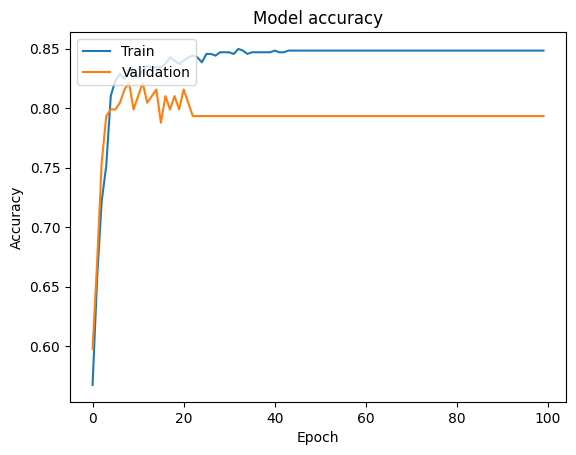

In [31]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Prediction:

In [32]:
predictions = model.predict(test_data)

14/14 [==============================] - 0s 1ms/step


In [34]:
op = model.predict([[3,1,22.000000,1,0,7.2500,2]])
if op[0][0] >= 0.50:
  print("Did not survived")
else:
  print("Did survived")

1/1 [==============================] - 0s 92ms/step
Did not survived
